In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import math

%matplotlib inline

In [2]:
df=pd.read_csv("/Users/igorvm/Downloads/train.csv")
df.fillna("", inplace=True)
print df.columns
train_df = df

Index([u'id', u'qid1', u'qid2', u'question1', u'question2', u'is_duplicate'], dtype='object')


In [32]:
def normalize_question(q):
    q = q.lower()
    q = q.replace("?","")
    q = q.replace("..."," . ")
    q = q.replace(".."," . ")
    q = q.replace("."," . ")
    q = q.replace(":"," : ")
    q = q.replace(","," , ")
    q = q.replace("/"," / ")
    q = q.replace("("," ( ")
    q = q.replace(")"," ) ")
    q = q.replace("n't", " not ")
    q = q.replace("i'm", "i am")
    q = q.replace("[math]", " [math] ")
    q = q.replace("[/math]", " [/math] ")
    q = q.replace("-"," - ")
    q = q.replace('"',' " ')
    q = q.replace("'s", " 's ")
    words = q.lower().split()
    #words = map(lambda x: x.strip(), words)
    #words = filter(lambda x: len(x) > 0, words)
    words = map(lambda w: w[:-1] + " s" if len(w)>3 and w[-1]=='s' and w != "this" else w, words)
    return " ".join(words)

def word_frequencies(questions):
    words = " ".join(questions).split(" ")
    counter = Counter(words)
    return sorted(counter.items(), key=lambda x:-x[1])

def cumulative(counts):
    s = 0
    cx, cy = [], []
    for i, n in enumerate(counts):
        s += n
        cx.append(i+1)
        cy.append(s)
    x = np.array(cx, dtype=np.float32)
    y = np.array(cy, dtype=np.float32)/s
    return x, y

def plot_cumulative(x):
    cx, cy = cumulative(x)

    ticks_major = np.arange(0.0, 1.1, 0.1)
    ticks_minor = np.arange(0.0, 1.1, 0.05)

    xticks = np.arange(0.0, 200.0, 10)

    fig = plt.figure()                                                               
    ax = fig.add_subplot(1,1,1)                                                      

    ax.plot(cx, cy)
    ax.set_xticks(xticks)                                                       
    ax.set_yticks(ticks_major)                                                       
    ax.set_yticks(ticks_minor, minor=True)                                                       
    ax.grid(True, which="both")
    plt.xscale("log")
    plt.show()

In [9]:
train_questions = df["question1"].tolist() + df["question2"].tolist()
train_questions = set(train_questions)
train_questions = map(normalize_question, train_questions)
train_frequencies = word_frequencies(train_questions)

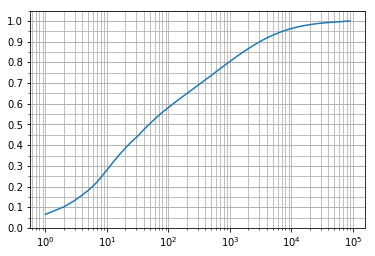

In [17]:
plot_cumulative([n for w, n in train_frequencies])


In [5]:
test_df = pd.read_csv("/Users/igorvm/Downloads/test.csv")
test_df.fillna("", inplace=True)
print test_df.columns

Index([u'test_id', u'question1', u'question2'], dtype='object')


In [10]:
test_questions = map(normalize_question, set(test_df["question1"].tolist() + test_df["question2"].tolist()))
#test_frequencies = word_frequencies(test_questions)
test_frequencies = word_frequencies(test_questions)

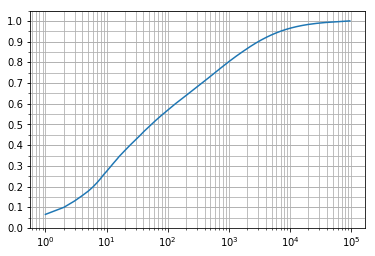

In [18]:
plot_cumulative([n for w, n in test_frequencies])

In [25]:
all_questions = set(test_questions + train_questions)
all_frequencies = word_frequencies(all_questions)

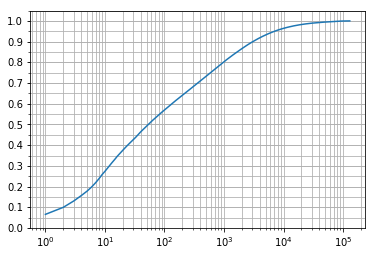

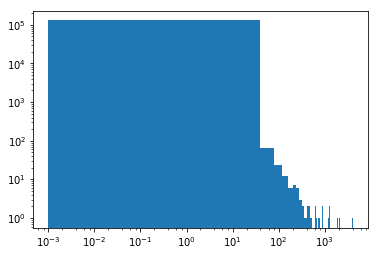

In [33]:
plot_cumulative([n for w, n in all_frequencies])


In [34]:
VocabularySize = 5000
encoding = { w:i for i, (w,n) in enumerate(all_frequencies[:VocabularySize])}

In [35]:
encoding

{'limited': 2202,
 'dinosaur': 4918,
 'magnetic': 1719,
 'personally': 3646,
 'dynamic': 2783,
 'yellow': 2483,
 'four': 1370,
 'sleep': 616,
 'asian': 1175,
 'controversial': 4703,
 'hanging': 4991,
 'captain': 2498,
 'hate': 539,
 'forget': 1519,
 'increase': 337,
 'voter': 3222,
 'calculate': 832,
 'filipino': 4333,
 'eligible': 1888,
 'electricity': 1717,
 '160': 4730,
 'punjab': 2385,
 'wayne': 4741,
 'seriously': 3707,
 'bike': 885,
 'restriction': 4986,
 'matlab': 3390,
 'under': 235,
 'lord': 1222,
 'sorry': 4353,
 'pride': 2991,
 'shepherd': 3826,
 'worth': 396,
 'tatkal': 3536,
 'merchant': 3133,
 'digit': 1806,
 'chennai': 955,
 'risk': 1524,
 'rise': 2306,
 'penny': 4212,
 'dell': 2681,
 'tenni': 2793,
 'shoot': 2836,
 'georgia': 4449,
 'every': 365,
 'jack': 3046,
 'kick': 4432,
 'affect': 398,
 'hon': 3497,
 'lumia': 3365,
 'encounter': 4593,
 'school': 196,
 'baking': 2343,
 'prize': 2948,
 'induction': 3988,
 'upe': 2939,
 'solution': 642,
 'hr': 1901,
 'frozen': 3898,
